# Stærðfræði og reiknifræði – Tímadæmi 8

In [8]:
#BYRJA -- Keyrið til að frumstilla -- og líka næsta reit.
import numpy as np, numpy.random as npr
import scipy.stats as stat, statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('axes', axisbelow=True);
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=4, floatmode='fixed', suppress=True)

In [13]:
plt.rc('figure',figsize=(11,4))  # Setja sjálfgefna stærð myndar (í sér-reit vegna böggs í matplotlib)

## 1. Brúun
#### A. LÍNULEG BRÚUN
Við höfum kynnst því hvernig finna má líkan sem lýsir gögnum með minnstu kvaðrata nálgun. Þá er fundin margliða, t.d. bein lína eða parabóla (gæti líka verið þriðja stigs fall o.s.frv.) sem fylgir gögnunum með skekkju. En það er líka hægt að finna margliðu sem fer nákvæmlega í gegn um gagnapunkta, og það er kallað brúun (*interpolation*). Gagnapunktarnir sem eru brúaðir eru oft kallaðir *brúunarpunktar* eða *hnútpunktar* (*knots*).

**i) Ein lína:** Úr rúmfræði er þekkt að í gegn um tvo punkta $(x_0, y_0)$ og $(x_1,y_1)$ liggur nákvæmlega ein lína. Til að finna hana má nota `a = np.polyfit(x,y)`. Finnið jöfnu línunnar sem fer í gegn um $(0,3)$ og $(2,5)$.

In [20]:
#Ai)
x = np.array([0,2])
y = np.array([3,5])
np.polyfit(x,y,1)

array([1.0000, 3.0000])

**ii) Línuleg bútabrúun (piecewise linear interpolation):**. Keyrið eftirfarandi dæmi og prófið líka að breyta því, t.d. með því að breyta `n` eða nota annað fall en `cos`. Við sjáum að `interp1d` skilar falli sem reiknar gildin á milli x og y með beinum línustrikum. Brúið líka punktana $(1,2), (2,0)$ og $(4,3)$.

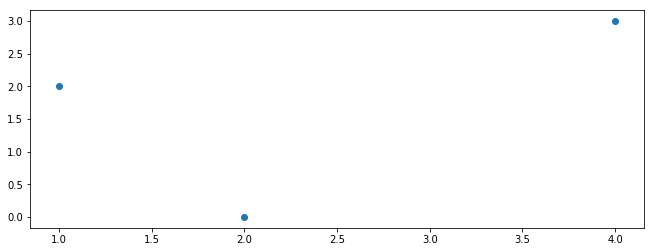

In [39]:
# mitt drasl
n = 10
X = np.array([1,2,4])
Y = np.array([2,0,3])
plt.scatter(X,Y)
f = interp1d(X, Y)
s = np.linspace(0, n, 10*n+1)
#plt.plot(s,f(s));

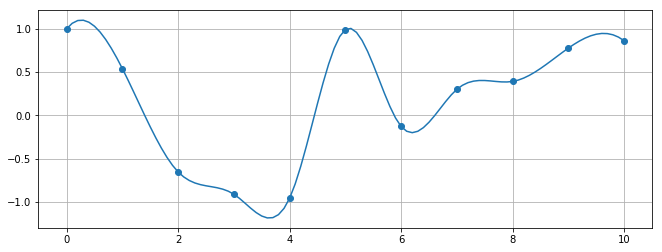

In [47]:
#Aii)
from scipy.interpolate import interp1d
n = 10
X = np.linspace(0, n, n+1)
Y = np.cos(X**2)
plt.scatter(X,Y)
f = interp1d(X, Y, kind='cubic')
s = np.linspace(0, n, 10*n+1)
plt.plot(s,f(s));
plt.grid()

**ATH:** Ef maður veit fyrirfram í hvaða gildum maður vill brúa þá er líka hægt að nota `np.interp` fyrir bútabrúun, t.d. `yt = np.interp(t,x,y)` þar sem `x` og `y` eru brúunarpunktarnir og `t` punktar þar sem reikna skal brúunargildi, sem fara í `yt`. Prófið þetta ef þið hafið tíma.

#### B. MARGLIÐUBRÚUN
Það eru ýmsar fleiri leiðir til að brúa, t.d. margliðubrúun (*polynomial interpolation*), sem byggir á þeirri staðreynd að í gegn um $n+1$ punkt $(x_0,y_0),...,(x_n,y_n)$ er til nákvæmlega ein $n$-ta stigs margliða. Við höfum notað `np.polyfit` til að brúa en ef við látum stigið á margliðunni sem beðið er um vera $n$ = "fjöldi punkta mínus 1" þá finnur það stuðla brúunarmargliðu. Svo má finna gildi margliðunnar t.d. með `yt = np.polyval(a,t)` þar sem `a` eru stuðlarnir sem `polyfit` fann.

**i)** Finnið 3. stigs margliðu sem brúar punktana $(0,0), (1,6), (2,4)$ og $(5,10)$. Teiknið punktana og margliðuna

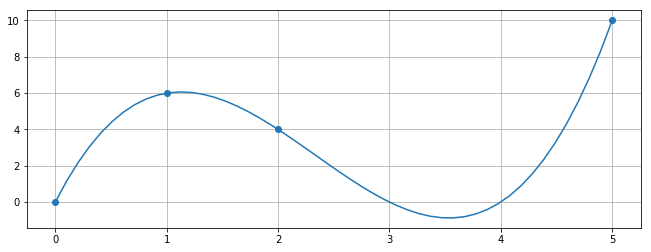

In [49]:
#Bi)
x = np.array([0,1,2,5])
y = np.array([0,6,4,10])
plt.scatter(x,y)
f = np.polyfit(x,y,3)
t = np.linspace(0,5)
yt = np.polyval(f, t)
plt.plot(t,yt);
plt.grid()

**ii)** Finnið og teiknið 10. stigs margliðu sem fer í gegn um hnútpunktana sem notaðir voru í bútabrúuninni í A-lið. Prófið að breyta $n$. Takið eftir hve niðurstaðan sveiflast mikið! Skoðið aðeins umfjöllun um [Runge-áhrifin](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) á Wikipediu.

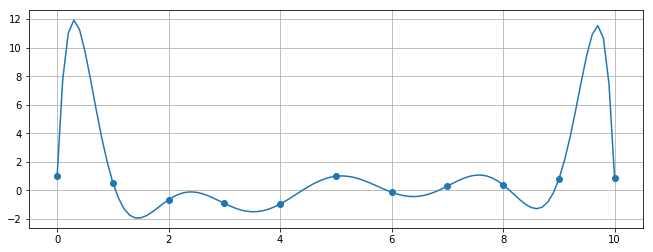

In [51]:
# Bii)
X = np.linspace(0, n, n+1)
Y = np.cos(X**2)
plt.scatter(X,Y)
f = np.polyfit(X,Y,10)

t = np.linspace(0,10,10*10+1)
yt = np.polyval(f, t)
plt.plot(t,yt);
plt.grid()

#### C. SPLÆSIBRÚUN
Það er líka hægt að nota svokallaða *splæsibrúun* (*spline interpolation*). Hún er bútabrúun þar sem gildið á hverjum bút er þriðja stigs margliða og svo eru settar skorður á margliðurnar, sem snúast um að þær mætist mjúklega í hnútpunktunum. Kíkið aðeins á Wikipediugreinina [um splæsibrúun](https://en.wikipedia.org/wiki/Spline_interpolation), og um teikniáhaldið [*flat spline*](https://en.wikipedia.org/wiki/Flat_spline).

Til að finna splæsibrúun má nota `interp1d(x, y, kind = 'cubic')`. Finnið og teiknið splæsibrúunarfall í gegn um punktana sem notaðir voru í B-lið, bæði i) og ii). Teiknið líka 10. stigs margliðuna úr B-lið inn á sömu mynd.

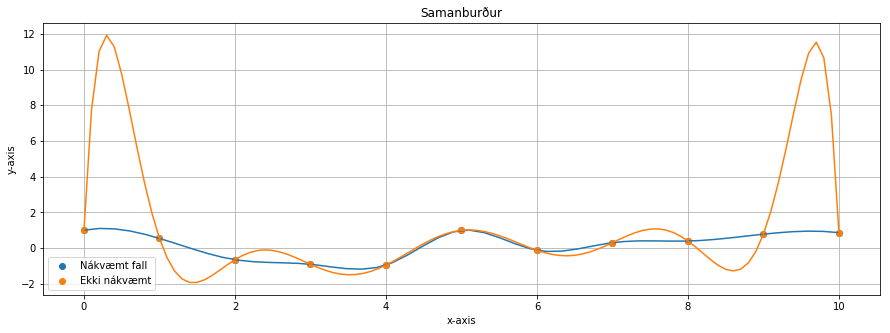

In [82]:
# Ci)
plt.figure(figsize=(15,5))
x = np.linspace(0, n, n+1)
y = np.cos(x**2)
plt.scatter(x,y,label='Nákvæmt fall')

f = interp1d(x, y, kind='cubic')
t = np.linspace(0,10)
plt.plot(t,f(t))
plt.grid()
# Cii)
X = np.linspace(0, n, n+1)
Y = np.cos(X**2)
plt.scatter(X,Y,label='Ekki nákvæmt')
f = np.polyfit(X,Y,10)

t = np.linspace(0,10,10*10+1)
yt = np.polyval(f, t)
plt.plot(t,yt)
plt.legend()
plt.title('Samanburður')
plt.xlabel('x-axis')
plt.ylabel('y-axis');

## 2. Jafna besta plans
Hér er aftur stutt æfing í að finna besta línulegt líkan (*jafna besta plans*). Í skránni laun.txt eru gögn um hæð, laun og háralit 100 manns (hæð í cm, háralitur á skala 1-99 ljósast–dekkst og laun í þús. kr.). Sannað hefur verið að lágvaxnir ljóshærðir menn fái á lág laun. Lesið skrána, plottið gögnin og finnið besta línulegt líkan fyrir þau. Túlkið líkanið með því að reikna út hvað hver punktur í háralit og hver cm í hæð sé mikils virði.

**Leiðbeiningar** Hér eru föllin sem þið þurfið að nota:
- `np.loadtxt` til að lesa skrána (notið `.T` og skilið í þrjá vigra)
- `np.scatter` með `c=hár` til að teikna.
- E.t.v. `np.set_cmap('viridis_r')` til að láta ljóshærða verða gula
- `X = np.c_[x1,x2]` til að búa til fylki með skýribreytum x1 og x2 í dálkum
- `X = sm.add_constant(X)` til að bæta við ásadálki
- `model = sm.OLS(laun, X)` til að setja upp líkan
- `result = model.fit()` til að finna stika
- `result.params` skilar stikum og `result.summary` skrifar út líkanið

[2.6895 1.9804 1.0099]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.521e+04
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          7.14e-122
Time:                        14:44:27   Log-Likelihood:                -161.02
No. Observations:                 100   AIC:                             328.0
Df Residuals:                      97   BIC:                             335.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6895      3.078      0.874      0.384      -3.419       8.798
x1             1.9804      0.017    116.150      0.000       1.947       2.014
x2             1.0099      0.009    114.208      0.000       0.992       1.027
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.156
Skew:                           0.018   Prob(JB):                        0.925
Kurtosis:                       2.810   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

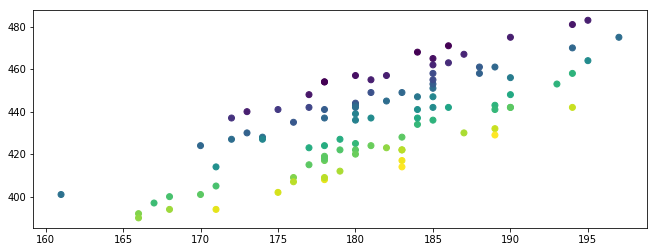

In [91]:
height, hair, pay = np.loadtxt('laun.txt').T
plt.scatter(height, pay, c=hair);
plt.set_cmap('viridis_r')
X = np.c_[height,hair]
X = sm.add_constant(X)
model = sm.OLS(pay, X)
result = model.fit()
disp(result.params)
result.summary()